In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.layers import Dense

C:\Users\sansk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.optimizers import RMSprop


In [8]:
insurance_data = pd.read_csv("C:\\Users\\sansk\\OneDrive\\Desktop\\Projects\\IITB OpenCV\\insurance.csv") #path of the raw dataset

In [9]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [11]:
insurance_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex'])    

In [15]:
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker'])

In [16]:
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region'])

In [17]:
insurance_data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [19]:
insurance_data['expenses']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

C:\Users\sansk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

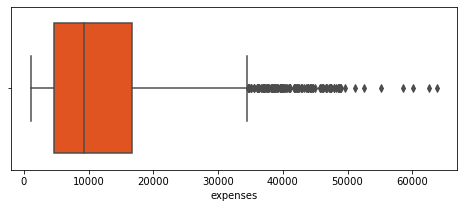

In [21]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.boxplot(insurance_data['expenses'], color = 'orangered', orient = 'h')

In [22]:
from scipy.stats import zscore
zscore(insurance_data)

,age,sex,bmi,children,smoker,region,expenses
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,1.343905,0.298583
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.054876,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.202511,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.022707,-0.908614,-0.507463,0.438495,-0.961597
1336,-1.296362,-1.010519,-0.798128,-0.908614,-0.507463,1.343905,-0.930361


In [25]:
insurance_data[np.abs(zscore(insurance_data['expenses'])) > 3]

,age,sex,bmi,children,smoker,region,expenses
34,28,1,36.4,1,1,3,51194.56
543,54,0,47.4,0,1,2,63770.43
577,31,0,38.1,1,1,0,58571.07
819,33,0,35.5,0,1,1,55135.40
1146,60,1,32.8,0,1,3,52590.83
1230,52,1,34.5,3,1,1,60021.40
1300,45,1,30.4,0,1,2,62592.87


In [27]:
insurance_data[np.abs(zscore(insurance_data['expenses'])) > 3]

,age,sex,bmi,children,smoker,region,expenses
34,28,1,36.4,1,1,3,51194.56
543,54,0,47.4,0,1,2,63770.43
577,31,0,38.1,1,1,0,58571.07
819,33,0,35.5,0,1,1,55135.40
1146,60,1,32.8,0,1,3,52590.83
1230,52,1,34.5,3,1,1,60021.40
1300,45,1,30.4,0,1,2,62592.87


In [30]:
X = insurance_data.drop(['expenses'], axis=1)
Y = insurance_data['expenses']

# Train and Test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=3)

In [32]:
from sklearn.model_selection import train_test_split
# splitting data into train & test i.e. 80% & 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# ANN Regression Model

In [33]:
def build_model():
    model = Sequential()
    # units = num of neurons, input_shape = number of features
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - For Regression
    model.add(Dense(units = 1))
    # Optimizers (alpha)
    optimizers = RMSprop(learning_rate = 0.001)
    # Model Compilers
    model.compile(loss = 'mean_squared_error',optimizer=optimizers, metrics=['mean_squared_error',
                                                                             'mean_absolute_error'])
    return model

In [34]:
model = build_model()

C:\Users\sansk\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,017 (648.50 KB)

 Trainable params: 166,017 (648.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# epochs = num of iterations, batch_size = sample size per iteration,
# validation_split = 20% (model test size), validation is done while training of model
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 277583072.0000 - mean_absolute_error: 12047.1162 - mean_squared_error: 277583072.0000 - val_loss: 247971440.0000 - val_mean_absolute_error: 10109.3105 - val_mean_squared_error: 247971440.0000
Epoch 2/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168854848.0000 - mean_absolute_error: 8065.3950 - mean_squared_error: 168854848.0000 - val_loss: 144880704.0000 - val_mean_absolute_error: 9418.7783 - val_mean_squared_error: 144880704.0000
Epoch 3/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 129028968.0000 - mean_absolute_error: 9099.2188 - mean_squared_error: 129028968.0000 - val_loss: 149050176.0000 - val_mean_absolute_error: 9023.5488 - val_mean_squared_error: 149050176.0000
Epoch 4/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124251664.0000 - mean_absolute_error: 8526.9297 - mean_squared_error: 124251664.0000 - val_loss: 143978336.0000 - val_mean_absolute_error: 9413.2305 - val_mean_squared_error: 143978336.0000
E

In [37]:
pd.DataFrame(history.history)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,266713872.0,11446.495117,266713872.0,247971440.0,10109.310547,247971440.0
1,146244656.0,7940.151367,146244656.0,144880704.0,9418.778320,144880704.0
2,125012856.0,8865.664062,125012856.0,149050176.0,9023.548828,149050176.0
3,124926488.0,8729.509766,124926488.0,143978336.0,9413.230469,143978336.0
4,123870584.0,8784.749023,123870584.0,148900352.0,8961.695312,148900352.0
...,...,...,...,...,...,...
595,19128422.0,2572.844971,19128422.0,34900160.0,4074.050537,34900160.0
596,19663612.0,2639.861328,19663612.0,37051672.0,3058.147217,37051676.0
597,19128760.0,2569.075439,19128760.0,42780648.0,3359.641357,42780648.0
598,19005952.0,2506.324463,19005952.0,35851632.0,3330.278320,35851632.0


<AxesSubplot:>

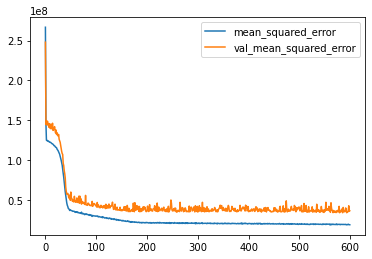

In [38]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [39]:
# Yhat   (representation of redicted value)
predictions = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [40]:
from sklearn.metrics import r2_score
# 0-1
r2_score(y_test, predictions)

0.8816965188672298

In [41]:
results = pd.DataFrame(predictions, columns = ['Predicted_Value'])

In [42]:
results['Actual_Value'] = np.array(y_test)

<AxesSubplot:>

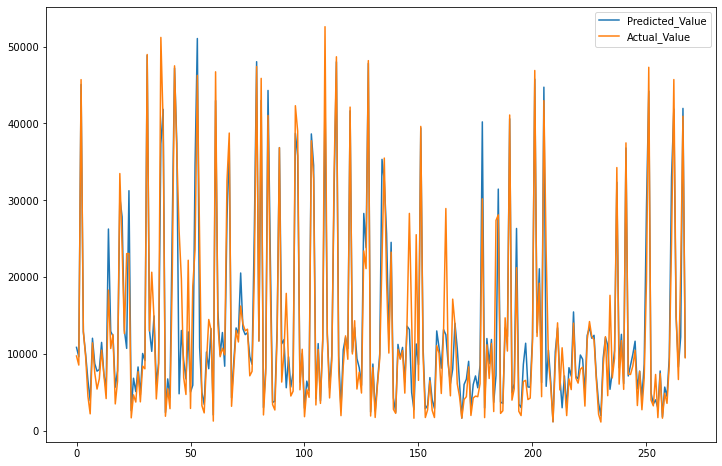

In [43]:
results.plot(figsize=(12,8))